In [1]:
import csv
import sys

In [2]:
#read from csv file

In [3]:
print(sys.argv[0])

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py


In [4]:
#function for generating file paths

def generateFilePath(groupNum, variance):
    return "/Users/apple/Documents/Dissertation/ExperimentResults/Group" + str(groupNum) + "-" + str(variance) + ".csv"

In [5]:
#define a class for player
class Player:
    playerNumber = 0
    pid = ""
    degree = 0
    label = ""
    def __init__(self, pid, degree, label):
        self.pid = pid
        self.degree = degree
        self.label = label
        
        Player.playerNumber += 1
    

In [6]:
#Start of one csv

In [7]:
csvFile = open(generateFilePath(1,10))

In [8]:
dataLines = csv.reader(csvFile)

In [9]:

data = []
roundNum = 0
distributionDicList = []


In [10]:
#csv列名['id', 'event', 'event_date', 'data_name', 'data_value']

In [11]:
#store the content in the csv file into a list

for line in dataLines:
    data.append(line)
    

In [12]:
#delete records before assigning labels

currentEvent = data[0][1]

while currentEvent != "PlayerLabel":
    #get the number of rounds
    if data[0][3] == 'nRounds':
        roundNum = int(data[0][4])
    del data[0]
    currentEvent = data[0][1]
    
    

In [13]:
#start making players list

players = []
onePlayer = []
newLine = []

while data[0][1] == 'PlayerLabel':
    
    #read 4 lines into onePlayer
    onePlayer = data[0:4]
    del data[0:4]
    
    
    #here comes a new player
    for i in range(len(onePlayer)):
        flag = onePlayer[i][3]
        if flag == "label":
            label = onePlayer[i][4]
        elif flag == "degree":
            degree = onePlayer[i][4]
        elif flag == "pid":
            pid = onePlayer[i][4]

    
    newPlayer = Player(pid, degree, label)
    players.append(newPlayer)

    


In [14]:
#making a dictionary recording the numbers of degrees of all the players a dic for labels and a list for pids
degreeDic = {}

#making a dictionary for the labels of all the players
labelDic = {}

#making a list for pids of all the players
pidList = []

for i in range(len(players)):
    pid = players[i].pid
    degree = players[i].degree
    label = players[i].label
    degreeDic[pid] = degree
    labelDic[pid] = label
    pidList.append(players[i].pid)
    

In [15]:
degreeDic

{'p1': '3',
 'p2': '5',
 'p3': '3',
 'p4': '5',
 'p5': '5',
 'p6': '3',
 '_1': '4',
 '_2': '4',
 '_3': '4',
 '_4': '3',
 '_5': '4',
 '_6': '3'}

In [16]:
labelDic

{'p1': 'H',
 'p2': 'B',
 'p3': 'C',
 'p4': 'A',
 'p5': 'E',
 'p6': 'I',
 '_1': 'J',
 '_2': 'D',
 '_3': 'L',
 '_4': 'K',
 '_5': 'F',
 '_6': 'G'}

In [17]:
#start sharing


for i in range(roundNum):
    
    #record the distribution in one round
    
    
    while(data[0][1] != "distributeBW"):
       
        del data[0]
   
       
    #iterate while in distribution round
    index = 0
    newLine = data[index]
    currentRoundDistributionDic = {}
    
    
    

    #enter the process of distribution
    while(newLine[1] == 'distributeBW'):

        #pendingLinesNum = 0
        #find the line with a pid
        while (newLine[3] != 'pid'):
            index += 1
            newLine = data[index]

            #record the number of pieces of distribution information that was created before printing pid
            #pendingLinesNum += 1

        #found the line with pid
        currentPid = newLine[4]
        currentPlayerLabel = labelDic[currentPid]
        currentPlayerDegree = int(degreeDic[currentPid])
        currentPlayerDistributionDic = {}


        for i in range(currentPlayerDegree + 3):
            dataName = data[i][3]
            currentDistributedResource = 0

            if dataName in pidList:
                #this line is a record that recods that the current player distributed his resource to a neighbour
                currentDistributedResource = int(data[i][4])
                currentPlayerDistributionDic[labelDic[dataName]] = currentDistributedResource
            elif dataName == 'resource':
                currentDistributedResource = int(data[i][4])
                currentPlayerDistributionDic[dataName] = currentDistributedResource

        #finish storing distribution information into dictionary then delete the lines belong to the current player
        currentRoundDistributionDic[currentPlayerLabel] = currentPlayerDistributionDic
        del data[0:currentPlayerDegree + 3]

        newLine = data[0]
        while (newLine[1] == "clientLogIn"):
            del data[0]
            newLine = data[0]
        index = 0

    
    #append the distribution dic of the current round to the distribution dic list
    distributionDicList.append(currentRoundDistributionDic)
    
    #remove result step records

    #delete "ResultStepStart" and "ResultStart"
    del data[0:2]

    while data[0][1] == 'ResultConfirmed':
        del data[0]


In [18]:
#get the total bonus of the human player
playerBonus = float(data[2][4])

In [19]:
playerBonus

15.8

In [20]:
distributionDicList[4]['I']

{'resource': 55, 'H': 20, 'B': 15, 'C': 20}

In [21]:
#test: get the number of resources given out in each round  e.g. human player

In [22]:
distributedList = []

for curRound in distributionDicList:
    distributedThisRound = 0
    humanPlayerDisDic = curRound['B']
    print(humanPlayerDisDic)
    for key, value in humanPlayerDisDic.items():
        if key != 'resource':
            distributedThisRound += value
    
    distributedList.append(distributedThisRound)

print(distributedList)

{'resource': 65, 'H': 13, 'J': 13, 'C': 13, 'F': 13, 'I': 13}
{'resource': 59, 'H': 11, 'J': 11, 'C': 11, 'F': 11, 'I': 11}
{'J': 8, 'C': 14, 'F': 8, 'I': 3, 'resource': 63, 'H': 30}
{'resource': 56, 'H': 6, 'J': 8, 'C': 15, 'F': 7, 'I': 20}
{'resource': 66, 'H': 25, 'J': 4, 'C': 8, 'F': 4, 'I': 25}
[65, 55, 63, 56, 66]


In [23]:
receivedList = []

for curRound in distributionDicList:
    receivedThisRound = 0
    
    neighbor1 = curRound['F']
    neighbor2 = curRound['I']
    
    for key, value in neighbor1.items():
        if key != 'resource':
            receivedThisRound += value
            
    for key, value in neighbor2.items():
        if key != 'resource':
            receivedThisRound += value 
            
    receivedList.append(receivedThisRound)

print(receivedList)

[70, 181, 121, 121, 110]


In [24]:
#calculate the total wealth of each player

In [25]:
totalWealthDic = {}

#initiate the dic
for label in labelDic.values():
    totalWealthDic[label] = 0

for curRound in distributionDicList:
    
    for dic in curRound.values():
        
        for key, value in dic.items():
            
            if key in labelDic.values():
                
                totalWealthDic[key] += value
        

In [26]:
totalWealthDic

{'H': 316,
 'B': 360,
 'C': 274,
 'A': 314,
 'E': 338,
 'I': 307,
 'J': 280,
 'D': 298,
 'L': 321,
 'K': 277,
 'F': 280,
 'G': 277}

In [27]:
#dic for average wealth of players with the same degree
    
degreeMax = max(list(map(int, list(degreeDic.values()))))
    
avgWealthDegreeList = [0 for i in range(degreeMax)]
    
for label, wealth in totalWealthDic.items():
        
    degreeOfLabel = int(degreeDic[list(labelDic.keys())[list(labelDic.values()).index(label)]])
    
    print(label, degreeOfLabel)
    
    avgWealthDegreeList[degreeOfLabel - 1] += wealth


print(avgWealthDegreeList)
for i in range(len(avgWealthDegreeList)):
    
    if (avgWealthDegreeList[i] != 0):

        avgWealthDegreeList[i]  = avgWealthDegreeList[i] / float(list(map(int, degreeDic.values())).count(i + 1))
    

H 3
B 5
C 3
A 5
E 5
I 3
J 4
D 4
L 4
K 3
F 4
G 3
[0, 0, 1451, 1179, 1012]


In [28]:
avgWealthDegreeList

[0, 0, 290.2, 294.75, 337.3333333333333]

In [29]:
#calculate Gini coefficient

In [30]:
import numpy as np

def gini_coef(wealths):
    cum_wealths = np.cumsum(sorted(np.append(wealths, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / np.float(len(cum_wealths)-1)
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A+B)



In [31]:
gini_coef(np.array(list(totalWealthDic.values())))

0.04791323448654572

In [32]:
#calculate the sharing coefficient

In [33]:
sharingCoefficientDic = {}

#initiate the dic
for label in labelDic.values():
    sharingCoefficientDic[label] = 0.0

isFirstRound = 1
    
for curRound in distributionDicList:
    

    for playerLabel, playerDisInCurRoundDic in curRound.items():
        
        #calculate for each player per round
        
        inResourceInCurRound = 0.0
        outResourceInCurRound = 0.0
        
        sharingNeighborNum = 0.0
        totalNeighborNum = 0.0
        
        sharingCoefficientInCurRound = 0.0
        
        
        
        for neighborLabel, value in playerDisInCurRoundDic.items():
        
            
            if neighborLabel == "resource":
                inResourceInCurRound = value
            else:
                
                if value != 1:
                    sharingNeighborNum += 1
                
                totalNeighborNum += 1
                outResourceInCurRound += value
        
        sharingCoefficientInCurRound = outResourceInCurRound / inResourceInCurRound * 0.5 + sharingNeighborNum / totalNeighborNum * 0.5
        
        if (isFirstRound):
            sharingCoefficientDic[playerLabel] = sharingCoefficientInCurRound
            
        else:
            sharingCoefficientDic[playerLabel] = (sharingCoefficientDic[playerLabel] + sharingCoefficientInCurRound) / 2
            
        
    isFirstRound = 0    
            
        
        

In [34]:
sharingCoefficientDic

{'H': 0.9729857698607699,
 'B': 0.9978813559322034,
 'C': 1.0138484990619137,
 'A': 0.9907426260180497,
 'E': 0.9090909090909091,
 'I': 0.9769021739130435,
 'J': 0.9490398401801352,
 'D': 0.9335781748405104,
 'L': 0.9709334277189137,
 'K': 0.9485815016719176,
 'F': 0.9287034231906591,
 'G': 0.9433681310697439}

In [35]:
import numpy as np

np.mean(list(sharingCoefficientDic.values()))

0.9613046527123975

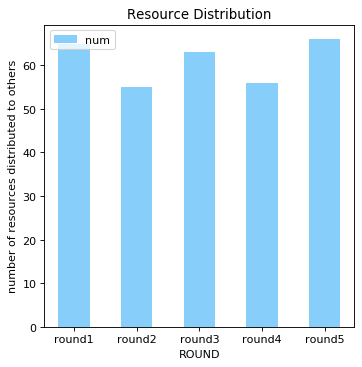

In [36]:
import matplotlib.pyplot as plt 
import numpy as np

# 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 80像素/每英寸
plt.figure(figsize=(5, 5), dpi=80)


# 柱子总数
N = 5
# 包含每个柱子对应值的序列
values = distributedList
# 包含每个柱子下标的序列
index = np.arange(N)
# 柱子的宽度
width = 0.5
# 绘制柱状图, 每根柱子的颜色为蓝色
p2 = plt.bar(index, values, width, label="num", color="#87CEFA")
# 设置横轴标签
plt.xlabel('ROUND')
# 设置纵轴标签
plt.ylabel('number of resources distributed to others')
# 添加标题
plt.title('Resource Distribution')
# 添加纵横轴的刻度
plt.xticks(index, ('round1', 'round2', 'round3', 'round4', 'round5'))
# plt.yticks(np.arange(0, 10000, 10))
# 添加图例
plt.legend(loc="upper left")
plt.show()

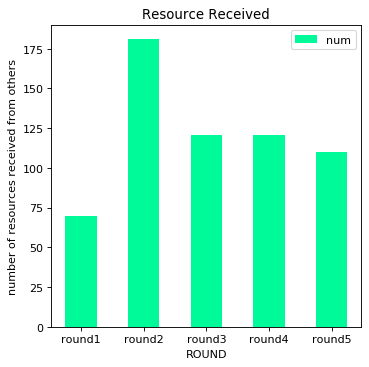

In [37]:
plt.figure(figsize=(5, 5), dpi=80)


# 柱子总数
N = 5
# 包含每个柱子对应值的序列
values = receivedList
# 包含每个柱子下标的序列
index = np.arange(N)
# 柱子的宽度
width = 0.5
# 绘制柱状图, 每根柱子的颜色为绿色
p2 = plt.bar(index, values, width, label="num", color="#00FA9A")
# 设置横轴标签
plt.xlabel('ROUND')
# 设置纵轴标签
plt.ylabel('number of resources received from others')
# 添加标题
plt.title('Resource Received')
# 添加纵横轴的刻度
plt.xticks(index, ('round1', 'round2', 'round3', 'round4', 'round5'))
# plt.yticks(np.arange(0, 10000, 10))
# 添加图例
plt.legend(loc="upper right")
plt.show()

In [38]:
# ratio graph

ratioList = []

for i in range(5):
    outRes = distributedList[i]
    inRes = receivedList[i]
    ratio = inRes * 1.0 / outRes
    
    ratioList.append(ratio)

print(ratioList)

[1.0769230769230769, 3.290909090909091, 1.9206349206349207, 2.1607142857142856, 1.6666666666666667]


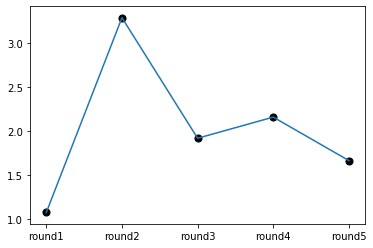

In [39]:
x_data = ['round1','round2','round3','round4','round5']
y_data = ratioList

plt.scatter(x_data, y_data, s=50, color='black')
plt.plot(x_data,y_data)
plt.show()

In [40]:
mamm = 5

lista = [0 for i in range(mamm)]

In [41]:
lista

[0, 0, 0, 0, 0]